In [146]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [147]:
pwd

'/Users/shardulsathe/Desktop/AIML/Month4/Project'

In [148]:
ls

Ensemble Techniques_R4_Project_Parkinson’s Disease.ipynb
parkinsons copy.csv
parkinsons.data
parkinsons.names


### Read Dataset 

In [149]:
voice_df = pd.read_csv('parkinsons.data')
voice_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [150]:
voice_df.shape

(195, 24)

In [151]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

There are 195 voice samples of 31 people. Status variable is the output variable. All other features are of the type float64. There are no Null values

In [152]:
voice_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### EDA

In [153]:
#sns.pairplot(voice_df) #Temporarily commented out to save runtime 

In [154]:
corr = voice_df.corr()
corr.style.background_gradient().set_precision(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1,0.4,0.6,-0.12,-0.38,-0.076,-0.11,-0.076,-0.098,-0.074,-0.095,-0.071,-0.078,-0.095,-0.022,0.059,-0.38,-0.38,-0.45,-0.41,-0.25,0.18,-0.37
MDVP:Fhi(Hz),0.4,1,0.085,0.1,-0.029,0.097,0.091,0.097,0.0023,0.043,-0.0037,-0.01,0.0049,-0.0037,0.16,-0.025,-0.17,-0.11,-0.34,-0.077,-0.003,0.18,-0.07
MDVP:Flo(Hz),0.6,0.085,1,-0.14,-0.28,-0.1,-0.096,-0.1,-0.14,-0.12,-0.15,-0.1,-0.11,-0.15,-0.11,0.21,-0.38,-0.4,-0.05,-0.39,-0.24,-0.1,-0.34
MDVP:Jitter(%),-0.12,0.1,-0.14,1,0.94,0.99,0.97,0.99,0.77,0.8,0.75,0.73,0.76,0.75,0.91,-0.73,0.28,0.36,0.099,0.69,0.39,0.43,0.72
MDVP:Jitter(Abs),-0.38,-0.029,-0.28,0.94,1,0.92,0.9,0.92,0.7,0.72,0.7,0.65,0.65,0.7,0.83,-0.66,0.34,0.44,0.18,0.74,0.39,0.31,0.75
MDVP:RAP,-0.076,0.097,-0.1,0.99,0.92,1,0.96,1,0.76,0.79,0.74,0.71,0.74,0.74,0.92,-0.72,0.27,0.34,0.064,0.65,0.32,0.43,0.67
MDVP:PPQ,-0.11,0.091,-0.096,0.97,0.9,0.96,1,0.96,0.8,0.84,0.76,0.79,0.8,0.76,0.84,-0.73,0.29,0.33,0.2,0.72,0.41,0.41,0.77
Jitter:DDP,-0.076,0.097,-0.1,0.99,0.92,1,0.96,1,0.76,0.79,0.74,0.71,0.74,0.74,0.92,-0.72,0.27,0.34,0.064,0.65,0.32,0.43,0.67
MDVP:Shimmer,-0.098,0.0023,-0.14,0.77,0.7,0.76,0.8,0.76,1,0.99,0.99,0.98,0.95,0.99,0.72,-0.84,0.37,0.45,0.16,0.65,0.45,0.51,0.69
MDVP:Shimmer(dB),-0.074,0.043,-0.12,0.8,0.72,0.79,0.84,0.79,0.99,1,0.96,0.97,0.96,0.96,0.74,-0.83,0.35,0.41,0.17,0.65,0.45,0.51,0.7


There are many features with very high correlation. Let's plot a few with correlation factor of 0.99

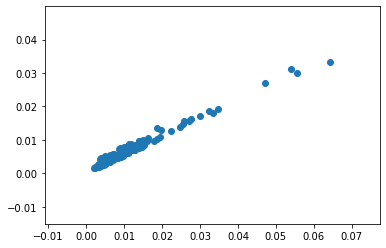

In [155]:
plt.scatter(voice_df['Jitter:DDP'],voice_df['MDVP:Jitter(%)'])

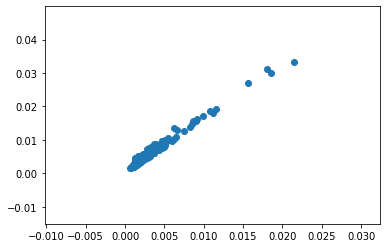

In [156]:
plt.scatter(voice_df['MDVP:RAP'],voice_df['MDVP:Jitter(%)'])

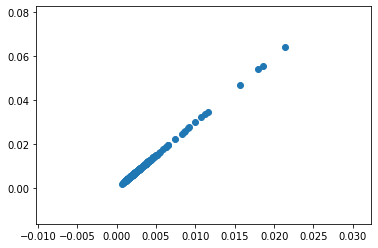

In [157]:
plt.scatter(voice_df['MDVP:RAP'],voice_df['Jitter:DDP'])

These 3 features have strong correlation with each other. We might drop 2 of them later 

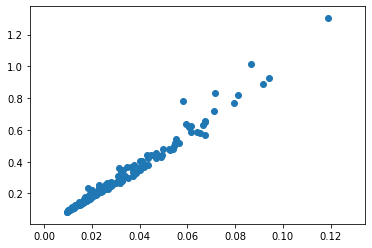

In [158]:
plt.scatter(voice_df['MDVP:Shimmer'],voice_df['MDVP:Shimmer(dB)'])

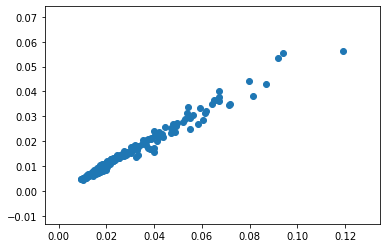

In [159]:
plt.scatter(voice_df['MDVP:Shimmer'],voice_df['Shimmer:APQ3'])

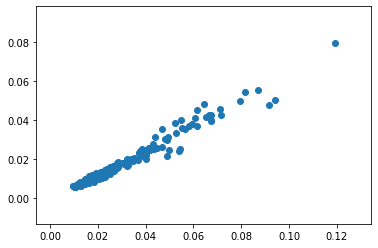

In [160]:
plt.scatter(voice_df['MDVP:Shimmer'],voice_df['Shimmer:APQ5'])

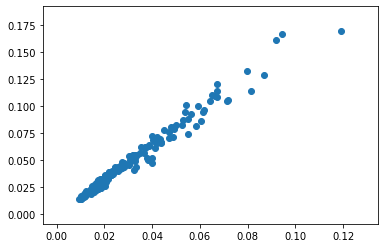

In [161]:
plt.scatter(voice_df['MDVP:Shimmer'],voice_df['Shimmer:DDA'])

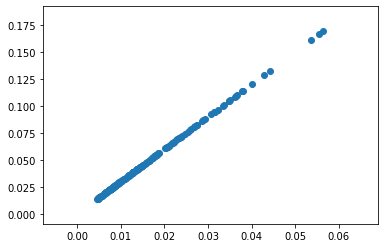

In [162]:
plt.scatter(voice_df['Shimmer:APQ3'],voice_df['Shimmer:DDA'])

(array([110.,  58.,  13.,   4.,   4.,   2.,   0.,   1.,   2.,   1.]),
 array([0.00068 , 0.002756, 0.004832, 0.006908, 0.008984, 0.01106 ,
        0.013136, 0.015212, 0.017288, 0.019364, 0.02144 ]),
 <a list of 10 Patch objects>)

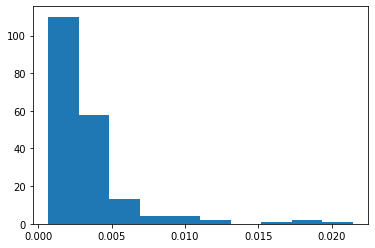

In [163]:
plt.hist(voice_df['MDVP:RAP'])

(array([72., 49., 24., 19., 11.,  9.,  6.,  2.,  0.,  3.]),
 array([0.01364 , 0.029218, 0.044796, 0.060374, 0.075952, 0.09153 ,
        0.107108, 0.122686, 0.138264, 0.153842, 0.16942 ]),
 <a list of 10 Patch objects>)

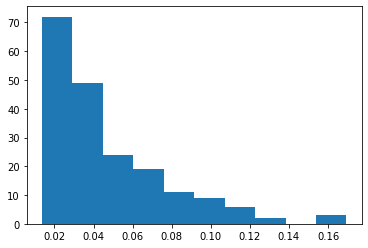

In [164]:
plt.hist(voice_df['Shimmer:DDA'])

(array([72., 49., 24., 19., 11.,  9.,  6.,  2.,  0.,  3.]),
 array([0.00455 , 0.009742, 0.014934, 0.020126, 0.025318, 0.03051 ,
        0.035702, 0.040894, 0.046086, 0.051278, 0.05647 ]),
 <a list of 10 Patch objects>)

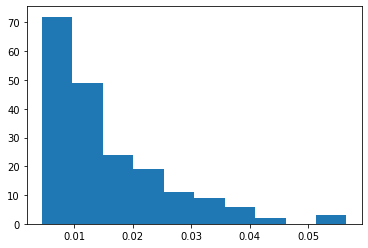

In [165]:
plt.hist(voice_df['Shimmer:APQ3'])    

(array([92., 50., 24.,  5., 13.,  7.,  3.,  0.,  0.,  1.]),
 array([0.0057 , 0.01307, 0.02044, 0.02781, 0.03518, 0.04255, 0.04992,
        0.05729, 0.06466, 0.07203, 0.0794 ]),
 <a list of 10 Patch objects>)

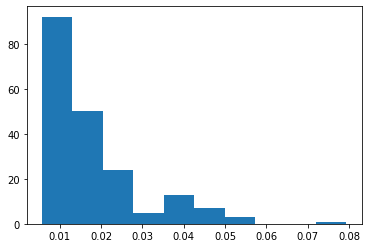

In [166]:
plt.hist(voice_df['Shimmer:APQ5'])    

(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

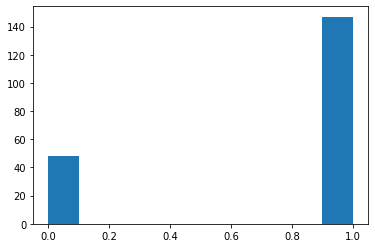

In [167]:
plt.hist(voice_df['status'])    

(array([ 6., 24., 28., 37., 44., 21., 20.,  7.,  4.,  4.]),
 array([-7.964984 , -7.4118887, -6.8587934, -6.3056981, -5.7526028,
        -5.1995075, -4.6464122, -4.0933169, -3.5402216, -2.9871263,
        -2.434031 ]),
 <a list of 10 Patch objects>)

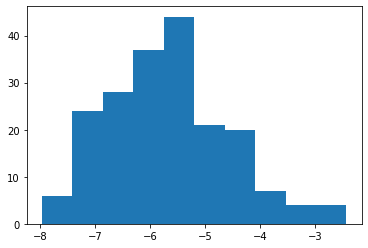

In [168]:
plt.hist(voice_df['spread1'])    

(array([ 2., 10., 13., 35., 47., 37., 22., 17.,  9.,  3.]),
 array([0.006274 , 0.0506959, 0.0951178, 0.1395397, 0.1839616, 0.2283835,
        0.2728054, 0.3172273, 0.3616492, 0.4060711, 0.450493 ]),
 <a list of 10 Patch objects>)

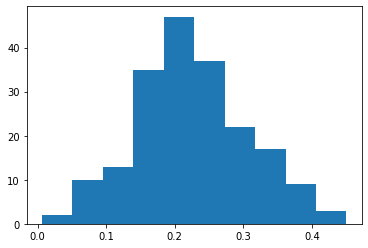

In [169]:
plt.hist(voice_df['spread2'])    

(array([69., 47., 53., 14.,  0.,  1.,  3.,  3.,  0.,  5.]),
 array([102.145 , 151.1335, 200.122 , 249.1105, 298.099 , 347.0875,
        396.076 , 445.0645, 494.053 , 543.0415, 592.03  ]),
 <a list of 10 Patch objects>)

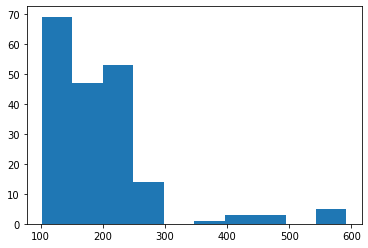

In [170]:
plt.hist(voice_df['MDVP:Fhi(Hz)'])        

From the pairplot, it can be seen that some of the histograms are right skewed and some of them such as 'spread2' seem to have normal distribution

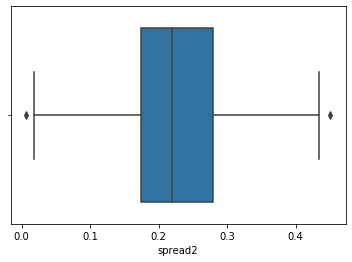

In [171]:
sns.boxplot(voice_df['spread2'])

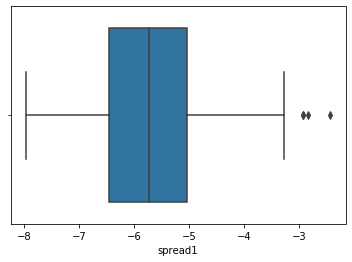

In [172]:
sns.boxplot(voice_df['spread1'])

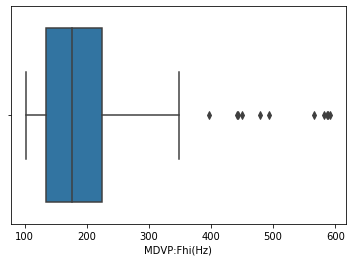

In [173]:
sns.boxplot(voice_df['MDVP:Fhi(Hz)'])

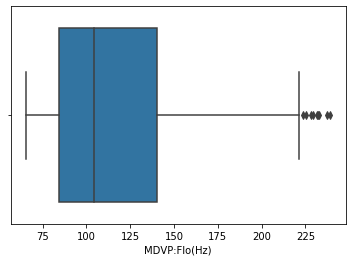

In [174]:
sns.boxplot(voice_df['MDVP:Flo(Hz)'])

Some of the features have high outliers, but the proportion seems to be low. Let's not remove the outliers and have the model learn from outliers

### Model Building

In [175]:
#Name column is not required. Let's drop it
voice_df.drop('name',inplace=True,axis=1)

In [176]:
#All features are of the type float. So no need to transform any variables.
def train_test_split_data(df):
    df = df.copy() #so that the modifications don't affect the original dataframe
    X =  df.drop("status", axis=1)
    y =  df.pop("status")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    return(X_train, X_test, y_train, y_test)

In [177]:
def buildDecisionTree(X_train, X_test, y_train, y_test,min_samples_leaf=1,max_depth=None):
    dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=1,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    y_predicted = dt_model.predict(X_test)
    score = dt_model.score(X_test ,y_test)
    print('Decision Tree Score: {}'.format(score))
    classification_report= metrics.classification_report(y_test, y_predicted)
    print('classification report:\n{}'.format(classification_report))
    conf_matrix = confusion_matrix(y_test,y_predicted)
    print('Confusion matrix:\n {}'.format(conf_matrix))
    print('Depth of the model: {}'.format(dt_model.tree_.max_depth))

In [178]:
X_train, X_test, y_train, y_test = train_test_split_data(voice_df)
buildDecisionTree(X_train, X_test, y_train, y_test) #without regularization

Decision Tree Score: 0.864406779661017
classification report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59

Confusion matrix:
 [[12  7]
 [ 1 39]]
Depth of the model: 4


The max depth of the tree without regularization is 4. Let's prune the tree to see if the score increases from 86.44%

## Regularization

In [179]:
#max depth = 3
buildDecisionTree(X_train, X_test, y_train, y_test,max_depth=3)

Decision Tree Score: 0.8983050847457628
classification report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59

Confusion matrix:
 [[15  4]
 [ 2 38]]
Depth of the model: 3


In [180]:
#max depth = 2
buildDecisionTree(X_train, X_test, y_train, y_test,max_depth=2)

Decision Tree Score: 0.7966101694915254
classification report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.77      1.00      0.87        40

    accuracy                           0.80        59
   macro avg       0.88      0.68      0.70        59
weighted avg       0.84      0.80      0.76        59

Confusion matrix:
 [[ 7 12]
 [ 0 40]]
Depth of the model: 2


In [181]:
#min_samples_leaf = 2, max_depth = 3
buildDecisionTree(X_train, X_test, y_train, y_test,min_samples_leaf=2,max_depth=3)

Decision Tree Score: 0.8983050847457628
classification report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59

Confusion matrix:
 [[15  4]
 [ 2 38]]
Depth of the model: 3


In [182]:
#min_samples_leaf = 7, max_depth = 3
buildDecisionTree(X_train, X_test, y_train, y_test,min_samples_leaf=7,max_depth=3)

Decision Tree Score: 0.8813559322033898
classification report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.87      0.97      0.92        40

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59

Confusion matrix:
 [[13  6]
 [ 1 39]]
Depth of the model: 3


In [183]:
#min_samples_leaf = 6, max_depth = 3
buildDecisionTree(X_train, X_test, y_train, y_test,min_samples_leaf=6,max_depth=3)

Decision Tree Score: 0.8983050847457628
classification report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59

Confusion matrix:
 [[14  5]
 [ 1 39]]
Depth of the model: 3


Combination of min_samples_leaf=6,max_depth=3 gives the highest score of 89.83% which is roughly 3% better than the model without regularization

### Random Forest

In [184]:
def buildRandomForest(n_estimators,X_train, X_test, y_train, y_test):
    rfcl = RandomForestClassifier(n_estimators = n_estimators,random_state=1)
    rfcl = rfcl.fit(X_train, y_train)
    test_pred = rfcl.predict(X_test)
    score = float(rfcl.score(X_test , y_test))
    print("n_trees: {}, RF Score: {}".format(n_estimators,round(score,3)))
    return(score)

In [185]:
buildRandomForest(20,X_train, X_test, y_train, y_test)

n_trees: 20, RF Score: 0.864


0.864406779661017

In [186]:
def runRandomForest(X_train, X_test, y_train, y_test):    
    rf_op = []
    start = 2
    stop = 40
    for i in range(start,stop):
        rf_op.append(buildRandomForest(i,X_train, X_test, y_train, y_test))

    max_score = max(rf_op)
    index_max_score = rf_op.index(max_score) + start
    print("Max score {} obtained with {} trees".format(round(max_score,3),index_max_score))

In [187]:
runRandomForest(X_train, X_test, y_train, y_test)

n_trees: 2, RF Score: 0.729
n_trees: 3, RF Score: 0.746
n_trees: 4, RF Score: 0.831
n_trees: 5, RF Score: 0.814
n_trees: 6, RF Score: 0.831
n_trees: 7, RF Score: 0.831
n_trees: 8, RF Score: 0.881
n_trees: 9, RF Score: 0.847
n_trees: 10, RF Score: 0.898
n_trees: 11, RF Score: 0.915
n_trees: 12, RF Score: 0.915
n_trees: 13, RF Score: 0.898
n_trees: 14, RF Score: 0.932
n_trees: 15, RF Score: 0.881
n_trees: 16, RF Score: 0.881
n_trees: 17, RF Score: 0.864
n_trees: 18, RF Score: 0.864
n_trees: 19, RF Score: 0.864
n_trees: 20, RF Score: 0.864
n_trees: 21, RF Score: 0.864
n_trees: 22, RF Score: 0.864
n_trees: 23, RF Score: 0.847
n_trees: 24, RF Score: 0.847
n_trees: 25, RF Score: 0.847
n_trees: 26, RF Score: 0.847
n_trees: 27, RF Score: 0.847
n_trees: 28, RF Score: 0.847
n_trees: 29, RF Score: 0.847
n_trees: 30, RF Score: 0.847
n_trees: 31, RF Score: 0.847
n_trees: 32, RF Score: 0.847
n_trees: 33, RF Score: 0.847
n_trees: 34, RF Score: 0.864
n_trees: 35, RF Score: 0.847
n_trees: 36, RF Score:

Random Forest performs better than a single single decision tree as expected

## Drop features with high correlation

Check if dropping the highly corrleated featutes helps improve the model accuracy

In [188]:
#Find highly correlated features which have correlation factors greater than the threshold
voice_corr = voice_df.corr().abs()

sorted_corr = voice_corr.unstack().sort_values(kind="quicksort")
threshold = 0.98
list_index = []
for i in range(len(sorted_corr)):
    if(sorted_corr[i]>threshold):
        list_index.append(i)
print(sorted_corr[list_index[0]:])        

Shimmer:APQ5      MDVP:Shimmer        0.982835
MDVP:Shimmer      Shimmer:APQ5        0.982835
                  MDVP:Shimmer(dB)    0.987258
MDVP:Shimmer(dB)  MDVP:Shimmer        0.987258
Shimmer:APQ3      MDVP:Shimmer        0.987625
MDVP:Shimmer      Shimmer:APQ3        0.987625
Shimmer:DDA       MDVP:Shimmer        0.987626
MDVP:Shimmer      Shimmer:DDA         0.987626
MDVP:RAP          MDVP:Jitter(%)      0.990276
MDVP:Jitter(%)    MDVP:RAP            0.990276
                  Jitter:DDP          0.990276
Jitter:DDP        MDVP:Jitter(%)      0.990276
MDVP:RAP          Jitter:DDP          1.000000
Jitter:DDP        MDVP:RAP            1.000000
Shimmer:DDA       Shimmer:APQ3        1.000000
Shimmer:APQ3      Shimmer:DDA         1.000000
MDVP:Fo(Hz)       MDVP:Fo(Hz)         1.000000
Shimmer:APQ5      Shimmer:APQ5        1.000000
spread2           spread2             1.000000
MDVP:Fhi(Hz)      MDVP:Fhi(Hz)        1.000000
MDVP:Flo(Hz)      MDVP:Flo(Hz)        1.000000
MDVP:Jitter(%

Using visual inspection, ignoring the diagonal values, the unique features that can be dropped are:
Shimmer:DDA, Jitter:DDP, MDVP:RAP, Shimmer:APQ3, Shimmer:APQ5

In [189]:
voice_truncated_df = voice_df.drop(columns=['Jitter:DDP', 'MDVP:RAP', 'Shimmer:APQ3', 'Shimmer:APQ5'])
voice_truncated_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [190]:
X_train, X_test, y_train, y_test = train_test_split_data(voice_truncated_df)
runRandomForest(X_train, X_test, y_train, y_test)


n_trees: 2, RF Score: 0.746
n_trees: 3, RF Score: 0.797
n_trees: 4, RF Score: 0.814
n_trees: 5, RF Score: 0.831
n_trees: 6, RF Score: 0.864
n_trees: 7, RF Score: 0.831
n_trees: 8, RF Score: 0.847
n_trees: 9, RF Score: 0.831
n_trees: 10, RF Score: 0.847
n_trees: 11, RF Score: 0.847
n_trees: 12, RF Score: 0.864
n_trees: 13, RF Score: 0.864
n_trees: 14, RF Score: 0.864
n_trees: 15, RF Score: 0.864
n_trees: 16, RF Score: 0.864
n_trees: 17, RF Score: 0.847
n_trees: 18, RF Score: 0.864
n_trees: 19, RF Score: 0.847
n_trees: 20, RF Score: 0.847
n_trees: 21, RF Score: 0.847
n_trees: 22, RF Score: 0.864
n_trees: 23, RF Score: 0.864
n_trees: 24, RF Score: 0.864
n_trees: 25, RF Score: 0.847
n_trees: 26, RF Score: 0.847
n_trees: 27, RF Score: 0.814
n_trees: 28, RF Score: 0.831
n_trees: 29, RF Score: 0.831
n_trees: 30, RF Score: 0.831
n_trees: 31, RF Score: 0.831
n_trees: 32, RF Score: 0.831
n_trees: 33, RF Score: 0.814
n_trees: 34, RF Score: 0.847
n_trees: 35, RF Score: 0.831
n_trees: 36, RF Score:

In [191]:
buildDecisionTree(X_train, X_test, y_train, y_test,min_samples_leaf=6,max_depth=3)

Decision Tree Score: 0.8983050847457628
classification report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59

Confusion matrix:
 [[14  5]
 [ 1 39]]
Depth of the model: 3


Dropping the features has not improved the decision tree but has negatively impacted random forest. Hence it is not a good idea to drop these columns. May be less columns should be dropped by increasing the threshold from 0.98

TODO: Not sure why A single decision tree is performing better than Random forest  after dropping the highly correlated features